In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [45]:
import glob
files = glob.glob('../../filldata/*')
files

['../../filldata/Data_Scaler_20180510.csv',
 '../../filldata/Data_Scaler_20181127.csv']

In [46]:
# Data loading and pre-processing:
#merged_data = pd.DataFrame()

for filename in sorted(files, reverse=True):
    if not filename.startswith("Data_Scaler"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset = dataset.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
    print (dataset.shape)
    dataset.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
    dataset = dataset.set_index('Timestamp')
    dataset.index = pd.DatetimeIndex(dataset.index).round(freq='1s')
    #dataset.index = pd.to_datetime(dataset.index)
    #dataset.columns[1] = pd.datetime.strptime(dataset.columns[1], "%X")
    print(dataset.head())    
    #print(dataset.index)
    print(dataset.index.shape)
    #print(type(dataset)) 

In [47]:
# Data loading and pre-processing:
dataset_train = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20180510.csv'), sep=',',infer_datetime_format=True)
dataset_train = dataset_train.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_train.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_train = dataset_train.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_train.index = pd.DatetimeIndex(dataset_train.index).round(freq='1s')#.round(freq='ms')
print(dataset_train.head())
    
dataset_test = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20181127.csv'), sep=',',infer_datetime_format=True)
dataset_test = dataset_test.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_test.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_test = dataset_test.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_test.index = pd.DatetimeIndex(dataset_test.index).round(freq='1s')
print(dataset_test.head())

#dataset_train.plot(figsize = (12,6))

                           ../../filldata/Data  Ch  s0  s1  s2
Timestamp                                                     
2018-05-10 20:54:19+00:00                    0   0   0   0   0
2018-05-10 20:54:19+00:00                    1   1   0   0   0
2018-05-10 20:54:19+00:00                    2   2   0   0   0
2018-05-10 20:54:19+00:00                    3   3   0   0   0
2018-05-10 20:54:19+00:00                    4   4   0   0   0
                           ../../filldata/Data  Ch  s0  s1  s2
Timestamp                                                     
2018-11-27 22:50:15+00:00                    0   0   0  24  26
2018-11-27 22:50:15+00:00                    1   1  57  39  41
2018-11-27 22:50:15+00:00                    2   2  45  36  32
2018-11-27 22:50:15+00:00                    3   3  19  12  22
2018-11-27 22:50:15+00:00                    4   4   8  18   0


In [48]:
# Data loading and pre-processing:
dataset_test = dataset_test.dropna()
dataset_train = dataset_train.dropna()
dataset_train[dataset_train.isna().any(axis=1)] 
dataset_test[dataset_test.isna().any(axis=1)] 
dataset_train = dataset_train.drop(dataset_train.columns[0], axis=1)
dataset_test = dataset_test.drop(dataset_test.columns[0], axis=1)
display(dataset_train)
display(dataset_test)

,Ch,s0,s1,s2
Timestamp,,,,
2018-05-10 20:54:19+00:00,0,0,0,0
2018-05-10 20:54:19+00:00,1,0,0,0
2018-05-10 20:54:19+00:00,2,0,0,0
2018-05-10 20:54:19+00:00,3,0,0,0
2018-05-10 20:54:19+00:00,4,0,0,0
...,...,...,...,...
2018-05-11 10:22:55+00:00,11,585,596,766
2018-05-11 10:22:55+00:00,12,582,634,708
2018-05-11 10:22:55+00:00,13,540,589,665


,Ch,s0,s1,s2
Timestamp,,,,
2018-11-27 22:50:15+00:00,0,0,24,26
2018-11-27 22:50:15+00:00,1,57,39,41
2018-11-27 22:50:15+00:00,2,45,36,32
2018-11-27 22:50:15+00:00,3,19,12,22
2018-11-27 22:50:15+00:00,4,8,18,0
...,...,...,...,...
2018-11-28 07:03:41+00:00,11,0,17,19
2018-11-28 07:03:41+00:00,12,12,18,12
2018-11-28 07:03:41+00:00,13,11,14,13


In [49]:
# Prepare only s_i for normalization

#dataset_train = dataset_train.drop(dataset_train.columns[3], axis=1)  # Prepare only s_0
#dataset_train = dataset_train.drop(dataset_train.columns[2], axis=1)  # Prepare only s_0
#dataset_test = dataset_test.drop(dataset_test.columns[3], axis=1)  # Prepare only s_0
#dataset_test = dataset_test.drop(dataset_test.columns[2], axis=1) # Prepare only s_0
#print(dataset_train)
#print(dataset_test)
dataset_train = dataset_train.drop(dataset_train.columns[3], axis=1)  # Prepare only s_1
dataset_train = dataset_train.drop(dataset_train.columns[1], axis=1)  # Prepare only s_1
dataset_test = dataset_test.drop(dataset_test.columns[3], axis=1)  # Prepare only s_1
dataset_test = dataset_test.drop(dataset_test.columns[1], axis=1) # Prepare only s_1
print(dataset_train)
print(dataset_test)
#dataset_train = dataset_train.drop(dataset_train.columns[2], axis=1)  # Prepare only s_2
#dataset_train = dataset_train.drop(dataset_train.columns[1], axis=1)  # Prepare only s_2
#dataset_test = dataset_test.drop(dataset_test.columns[2], axis=1)  # Prepare only s_2
#dataset_test = dataset_test.drop(dataset_test.columns[1], axis=1) # Prepare only s_2
#print(dataset_train)
#print(dataset_test)

                           Ch   s1
Timestamp                         
2018-05-10 20:54:19+00:00   0    0
2018-05-10 20:54:19+00:00   1    0
2018-05-10 20:54:19+00:00   2    0
2018-05-10 20:54:19+00:00   3    0
2018-05-10 20:54:19+00:00   4    0
...                        ..  ...
2018-05-11 10:22:55+00:00  11  596
2018-05-11 10:22:55+00:00  12  634
2018-05-11 10:22:55+00:00  13  589
2018-05-11 10:22:55+00:00  14  525
2018-05-11 10:22:55+00:00  15  596

[1065584 rows x 2 columns]
                           Ch  s1
Timestamp                        
2018-11-27 22:50:15+00:00   0  24
2018-11-27 22:50:15+00:00   1  39
2018-11-27 22:50:15+00:00   2  36
2018-11-27 22:50:15+00:00   3  12
2018-11-27 22:50:15+00:00   4  18
...                        ..  ..
2018-11-28 07:03:41+00:00  11  17
2018-11-28 07:03:41+00:00  12  18
2018-11-28 07:03:41+00:00  13  14
2018-11-28 07:03:41+00:00  14  17
2018-11-28 07:03:41+00:00  15  21

[649568 rows x 2 columns]


In [50]:
#try to consider only ch_i and s0
dataset_train = dataset_train.loc[dataset_train['Ch'] == 3]
dataset_test = dataset_test.loc[dataset_test['Ch'] == 3]
display(dataset_train)
display(dataset_test)

,Ch,s1
Timestamp,,
2018-05-10 20:54:19+00:00,3,0
2018-05-10 20:54:20+00:00,3,522
2018-05-10 20:54:21+00:00,3,498
2018-05-10 20:54:22+00:00,3,482
2018-05-10 20:54:22+00:00,3,447
...,...,...
2018-05-11 10:22:52+00:00,3,575
2018-05-11 10:22:52+00:00,3,606
2018-05-11 10:22:53+00:00,3,521


,Ch,s1
Timestamp,,
2018-11-27 22:50:15+00:00,3,12
2018-11-27 22:50:15+00:00,3,14
2018-11-27 22:50:16+00:00,3,30
2018-11-27 22:50:17+00:00,3,24
2018-11-27 22:50:18+00:00,3,28
...,...,...
2018-11-28 07:03:38+00:00,3,16
2018-11-28 07:03:38+00:00,3,17
2018-11-28 07:03:39+00:00,3,10


In [51]:
# Normalize TRAIN data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train = dataset_train.iloc[:, [0]]

df = pd.DataFrame(scaler.fit_transform(dataset_train.iloc[:,1:]), columns=dataset_train.columns[1:])
df['Timestamp'] = dataset_train.index
df.set_index('Timestamp')
first_column = df.pop('Timestamp')
df.insert(0, 'Timestamp', first_column)
#print(X_train.head)
#X_train[['s0']] = df [['s0']].values
X_train[['s1']] = df [['s1']].values
#X_train[['s2']] = df [['s2']].values
display(X_train)

# Random shuffle training data
X_train = X_train.sample(frac=1)
display(X_train)

,Ch,s1
Timestamp,,
2018-05-10 20:54:19+00:00,3,-3.277563
2018-05-10 20:54:20+00:00,3,-3.276777
2018-05-10 20:54:21+00:00,3,-3.276814
2018-05-10 20:54:22+00:00,3,-3.276838
2018-05-10 20:54:22+00:00,3,-3.276890
...,...,...
2018-05-11 10:22:52+00:00,3,-3.276698
2018-05-11 10:22:52+00:00,3,-3.276651
2018-05-11 10:22:53+00:00,3,-3.276779


,Ch,s1
Timestamp,,
2018-05-11 00:45:54+00:00,3,0.771292
2018-05-11 03:24:33+00:00,3,0.062317
2018-05-11 05:09:50+00:00,3,-0.309330
2018-05-11 04:50:19+00:00,3,-0.224895
2018-05-10 23:29:15+00:00,3,0.993526
...,...,...
2018-05-11 08:22:17+00:00,3,-0.939730
2018-05-11 00:00:41+00:00,3,1.002382
2018-05-10 22:11:48+00:00,3,1.546382


In [52]:
# Normalize TEST data
X_test = dataset_test.iloc[:, [0]]

df = pd.DataFrame(scaler.fit_transform(dataset_test.iloc[:,1:]), columns=dataset_test.columns[1:])
df['Timestamp'] = dataset_test.index
df.set_index('Timestamp')
first_column = df.pop('Timestamp')
df.insert(0, 'Timestamp', first_column)
#print(X_train.head)
#print(df.head)
#X_test[['s0']] = df [['s0']].values
X_test[['s1']] = df [['s1']].values
#X_test[['s2']] = df [['s2']].values
display(X_test)

,Ch,s1
Timestamp,,
2018-11-27 22:50:15+00:00,3,-1.660318
2018-11-27 22:50:15+00:00,3,-1.659226
2018-11-27 22:50:16+00:00,3,-1.650495
2018-11-27 22:50:17+00:00,3,-1.653769
2018-11-27 22:50:18+00:00,3,-1.651587
...,...,...
2018-11-28 07:03:38+00:00,3,-1.658135
2018-11-28 07:03:38+00:00,3,-1.657589
2018-11-28 07:03:39+00:00,3,-1.661409


In [53]:
#Drop channel column
X_train=X_train.drop(X_train.columns[[0]], axis=1)
display(X_train)
X_test = X_test.drop(X_test.columns[[0]], axis=1)
display(X_test)

,s1
Timestamp,
2018-05-11 00:45:54+00:00,0.771292
2018-05-11 03:24:33+00:00,0.062317
2018-05-11 05:09:50+00:00,-0.309330
2018-05-11 04:50:19+00:00,-0.224895
2018-05-10 23:29:15+00:00,0.993526
...,...
2018-05-11 08:22:17+00:00,-0.939730
2018-05-11 00:00:41+00:00,1.002382
2018-05-10 22:11:48+00:00,1.546382


,s1
Timestamp,
2018-11-27 22:50:15+00:00,-1.660318
2018-11-27 22:50:15+00:00,-1.659226
2018-11-27 22:50:16+00:00,-1.650495
2018-11-27 22:50:17+00:00,-1.653769
2018-11-27 22:50:18+00:00,-1.651587
...,...
2018-11-28 07:03:38+00:00,-1.658135
2018-11-28 07:03:38+00:00,-1.657589
2018-11-28 07:03:39+00:00,-1.661409


In [54]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns

2022-08-08 15:25:30.201760: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft-nightlies.cern.ch/lcg/latest/MCGenerators/thepeg/2.2.3-bb611/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft-nightlies.cern.ch/lcg/latest/MCGenerators/herwig++/7.2.3-5f56d/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11

In [55]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 

seq_size = 30  # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):
        #print(i)
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)

In [56]:
#Define sequences from dataframe
trainX, trainY = to_sequences(X_train, X_train, seq_size)
testX, testY = to_sequences(X_test,X_test, seq_size)

In [63]:
np.shape(trainX)

(66569, 30, 1)

In [59]:
#Define the model
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(trainX.shape[1]))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

2022-08-08 15:27:09.068916: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-08 15:27:09.068983: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lxplus782.cern.ch): /proc/driver/nvidia/version does not exist
2022-08-08 15:27:09.070682: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 30, 1)            129       
 ibuted)                                                

In [60]:
#Fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
1873/1873 [==============================] - 125s 65ms/step - loss: 0.8102 - val_loss: 0.8079
Epoch 2/10
1873/1873 [==============================] - 146s 78ms/step - loss: 0.8099 - val_loss: 0.8081
Epoch 3/10
1873/1873 [==============================] - 148s 79ms/step - loss: 0.8098 - val_loss: 0.8081
Epoch 4/10
1873/1873 [==============================] - 184s 98ms/step - loss: 0.8099 - val_loss: 0.8080
Epoch 5/10
1873/1873 [==============================] - 202s 108ms/step - loss: 0.8098 - val_loss: 0.8080
Epoch 6/10
1873/1873 [==============================] - 201s 108ms/step - loss: 0.8098 - val_loss: 0.8079
Epoch 7/10
1873/1873 [==============================] - 202s 108ms/step - loss: 0.8098 - val_loss: 0.8080
Epoch 8/10
1873/1873 [==============================] - 199s 106ms/step - loss: 0.8098 - val_loss: 0.8079
Epoch 9/10
1873/1873 [==============================] - 207s 110ms/step - loss: 0.8098 - val_loss: 0.8086
Epoch 10/10
1873/1873 [===========================

In [57]:
# Visualize training/validation loss:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
#plt.ylim([0,.1])
plt.yscale('log')
plt.show()

NameError: name 'history' is not defined

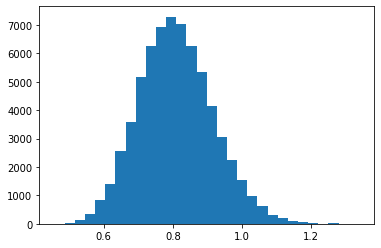

In [ ]:
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
plt.hist(trainMAE, bins=30)
threshold = 1.2  #or Define 90% value of max as threshold.

(array([2763., 2055., 2289., 2178., 2461., 2448., 2645., 2847., 3036.,
        3442., 3703., 2042.,  544.,  513.,  449.,  446.,  404.,  446.,
         580., 1443.,  360.,  390.,  294.,  307.,  311.,  375.,  403.,
         204.,  531.,  659.]),
 array([0.02215293, 0.1062281 , 0.19030327, 0.27437843, 0.3584536 ,
        0.44252877, 0.52660393, 0.6106791 , 0.69475427, 0.77882943,
        0.8629046 , 0.94697977, 1.03105493, 1.1151301 , 1.19920526,
        1.28328043, 1.3673556 , 1.45143076, 1.53550593, 1.6195811 ,
        1.70365626, 1.78773143, 1.8718066 , 1.95588176, 2.03995693,
        2.1240321 , 2.20810726, 2.29218243, 2.3762576 , 2.46033276,
        2.54440793]),
 <BarContainer object of 30 artists>)

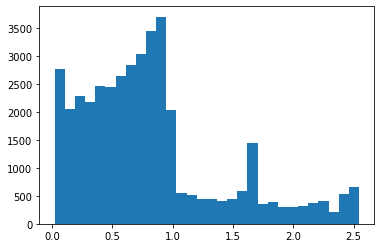

In [ ]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
plt.hist(testMAE, bins=30)

In [ ]:
#Capture all details in a DataFrame for easy plotting-test
anomaly_df = pd.DataFrame(X_test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['Threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['Threshold']

In [ ]:
display(anomaly_df)

,s1,testMAE,Threshold,anomaly
Timestamp,,,,
2018-11-27 22:50:39+00:00,-1.649949,1.622544,1.2,True
2018-11-27 22:50:40+00:00,-1.652678,1.622200,1.2,True
2018-11-27 22:50:40+00:00,-1.653769,1.621981,1.2,True
2018-11-27 22:50:41+00:00,-1.651041,1.622089,1.2,True
2018-11-27 22:50:42+00:00,-1.649404,1.621999,1.2,True
...,...,...,...,...
2018-11-28 07:03:38+00:00,-1.658135,1.349670,1.2,True
2018-11-28 07:03:38+00:00,-1.657589,1.371026,1.2,True
2018-11-28 07:03:39+00:00,-1.661409,1.391054,1.2,True


<AxesSubplot:xlabel='Timestamp'>

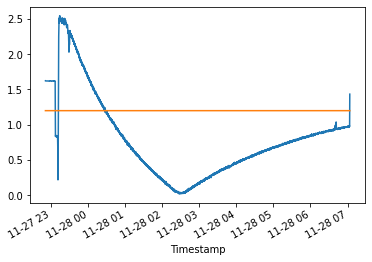

In [ ]:
#Plot testMAE vs max_trainMAE
anomaly_df['testMAE'].plot()
anomaly_df['Threshold'].plot()

<AxesSubplot:xlabel='Timestamp', ylabel='s1'>

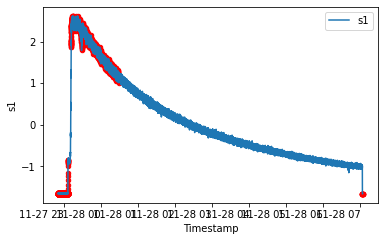

In [ ]:
#Prepare to plot anomalies-Test 
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
anomaly_df=anomaly_df.drop(anomaly_df.columns[[1]], axis=1)
anomalies=anomalies.drop(anomalies.columns[[1]], axis=1)
anomaly_df=anomaly_df.drop(anomaly_df.columns[[2]], axis=1)
anomalies=anomalies.drop(anomalies.columns[[2]], axis=1)
anomaly_df=anomaly_df.drop(anomaly_df.columns[[1]], axis=1)
anomalies['Timestamp'] = anomalies.index
#Plot anomalies-Test
ax=anomaly_df.plot()
anomalies.plot.scatter(ax=ax,x='Timestamp',y='s1', color='r')

In [ ]:
#Capture all details in a DataFrame for easy plotting-train
anomaly = pd.DataFrame(X_train[seq_size:])
anomaly['trainMAE'] = trainMAE
anomaly['Threshold'] = threshold
anomaly['anomaly'] = anomaly['trainMAE'] > anomaly['Threshold']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Timestamp', ylabel='s1'>

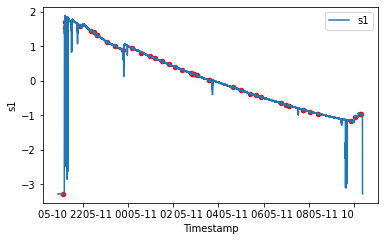

In [ ]:
#Plot anomalies-Train
anomalies2 = anomaly.loc[anomaly['anomaly'] == True]
anomalies2['Timestamp'] = anomalies2.index
ax=X_train.plot()
anomalies2.plot.scatter(ax=ax, x= 'Timestamp', y='s1', color= 'r')

In [ ]:
# Prepare only channel i for normalization, considering all s0,s1,s2
dataset_train = dataset_train.loc[dataset_train['Ch'] == 5]
print(dataset_train)
dataset_test = dataset_test.loc[dataset_test['Ch'] == 5]
print(dataset_test)

In [ ]:
# Normalize TRAIN data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train = dataset_train.iloc[:, [0]]

df = pd.DataFrame(scaler.fit_transform(dataset_train.iloc[:,1:]), columns=dataset_train.columns[1:])
df['Timestamp'] = dataset_train.index
df.set_index('Timestamp')
first_column = df.pop('Timestamp')
df.insert(0, 'Timestamp', first_column)
#print(X_train.head)
#X_train[['s0']] = df [['s0']].values
X_train[['s1']] = df [['s1']].values
#X_train[['s2']] = df [['s2']].values
display(X_train)

# Random shuffle training data
X_train = X_train.sample(frac=1)
display(X_train)

In [ ]:
# Normalize TEST data
X_test = dataset_test.iloc[:, [0]]

df = pd.DataFrame(scaler.fit_transform(dataset_test.iloc[:,1:]), columns=dataset_test.columns[1:])
df['Timestamp'] = dataset_test.index
df.set_index('Timestamp')
first_column = df.pop('Timestamp')
df.insert(0, 'Timestamp', first_column)
#print(X_train.head)
#print(df.head)
X_test[['s0']] = df [['s0']].values
X_test[['s1']] = df [['s1']].values
X_test[['s2']] = df [['s2']].values
display(X_test)
column = X_test["s0"]
max_value = column.max()
print(max_value)